# Encoding Numerical features:
In Machine Learning (ML), encoding numerical features involves transforming continuous numerical data into a format suitable for machine learning models. Discretization and binarization are two common techniques used for this purpose.


## Discretization or Binning:
Discretization involves converting continuous numerical features into discrete intervals or categories. This technique is useful when a continuous variable needs to be represented in a categorical or ordinal form.

###### Purpose:
1. to handle outliers
2. to improve the value spread

###### There are different methods for discretization:
1. Unsupervised Binning
2. Supervised Binning
3. Custom Binning

Unsupervised binning includes Equal width or uniform binning, equal frequency binning or quantile binning, K means binning

supervised binning includes decision tree binning


###### Equal Width Binning or Uniform Binning: 
Dividing the range of values into bins of equal width. 
###### Equal Frequency Binning or quantile Binning: 
Dividing data into bins with approximately the same number of instances in each bin.
###### K Means Binning:
uses the K-means clustering algorithm to partition continuous numerical data into discrete bins or intervals.
###### Decision Tree Discretization: 
Using decision trees to find the best split points for discretization.

For example, if you have a continuous feature like age, you might discretize it into age groups such as 'child', 'teen', 'adult', and 'elderly'.


## Binarization:
Binarization converts numerical features into binary values (0s and 1s) based on a specified threshold. Any value above the threshold becomes 1, and anything below becomes 0.

For instance, if you have a feature representing income and you set a threshold at $50,000, then all incomes above $50,000 might be labeled as 1 (indicating high income), and those below as 0 (indicating low income).

Binarization is useful when you want to convert numerical features into a binary format to capture specific characteristics or simplify the data for certain models that work well with binary inputs.


In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(714, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [10]:
clf = DecisionTreeClassifier()

In [11]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [12]:
accuracy_score(y_test,y_pred)

0.6433566433566433

In [13]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6303012519561815

In [14]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [15]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [16]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [17]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [18]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [19]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [20]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())



In [21]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
161,40.0,11.0,15.75,7.0,"(38.0, 42.0]","(14.454, 18.75]"
383,35.0,10.0,52.00,12.0,"(32.0, 35.0]","(51.479, 76.292]"
208,16.0,2.0,7.75,1.0,"(6.0, 16.0]","(7.25, 7.775]"
276,45.0,12.0,7.75,1.0,"(42.0, 47.0]","(7.25, 7.775]"
684,60.0,14.0,39.00,11.0,"(54.0, 80.0]","(31.275, 51.479]"


In [22]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [23]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [24]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6344874804381846

In [25]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy, subsample=None)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy, subsample=None)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6303012519561815


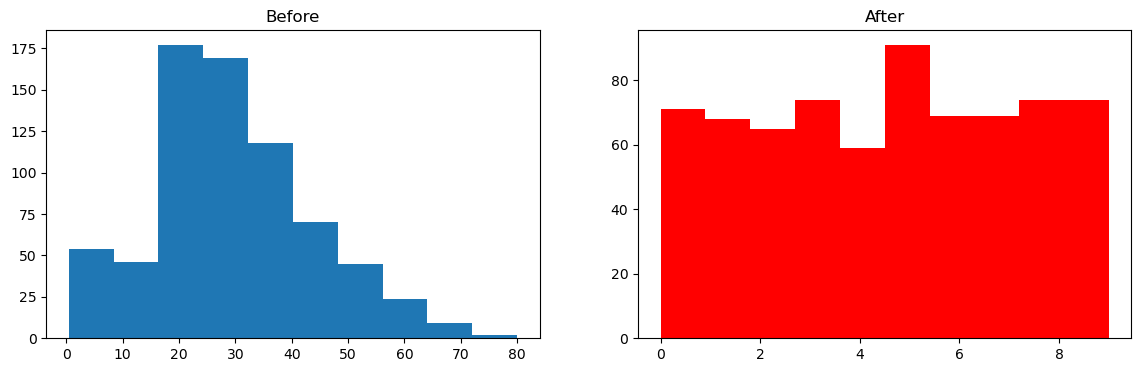

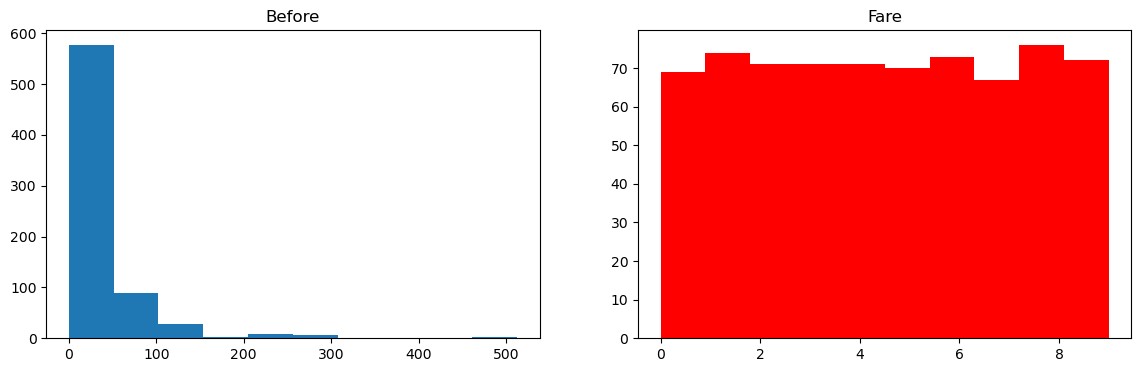

In [26]:
discretize(10,'quantile')

0.635935054773083


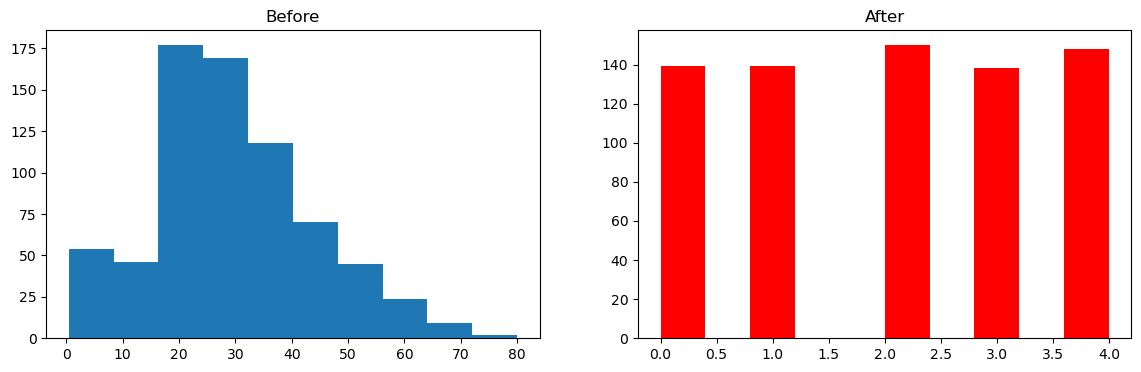

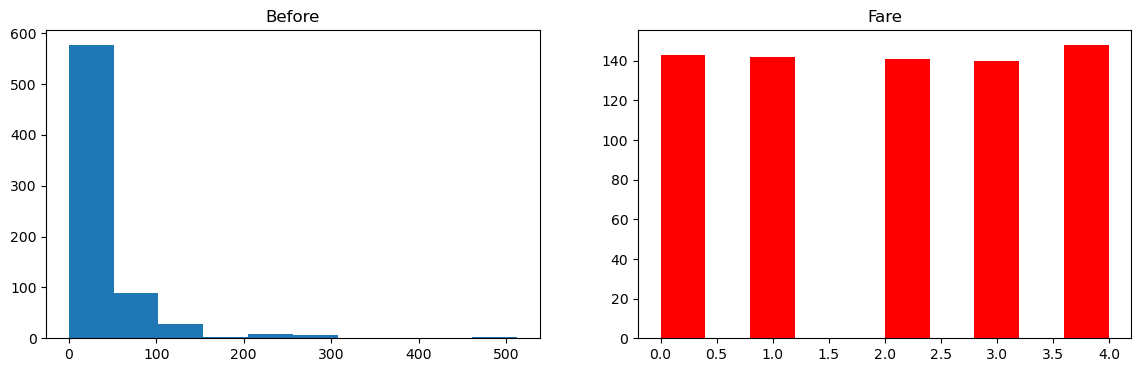

In [27]:
discretize(5,'quantile')

0.6247456964006259


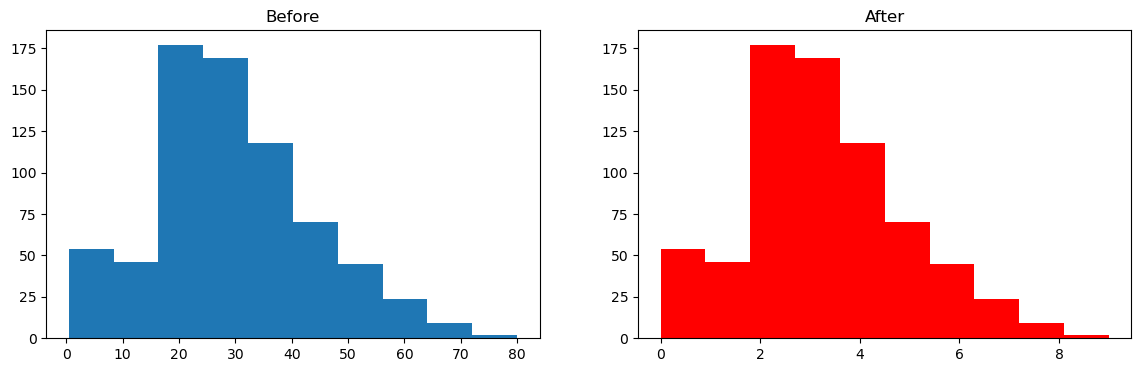

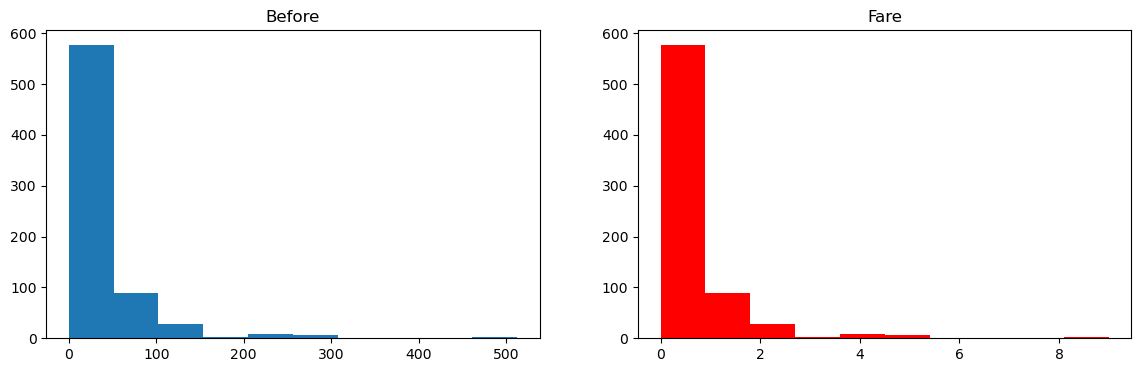

In [28]:
discretize(10,'uniform')

In [29]:
# discretize(10,'kmeans')